# Regression

### R2 Score Value:

R2 = ESS/ TSS

ESS => Sum of prediction

TSS => Sum of Actual

Accuracy calculated based on the  R2 score value of the regression model

### Adjusted R2 Score Value:

Adjusted R2 = R2 x (Penalty for adding irrelevent variables)

Irrelevent variables are deleted in adjusted r2.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('datasets/boston_data.csv', index_col=0)
data.head(5)

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
ID,,,,,,,,,,,
1,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
4,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
7,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9


In [2]:
data.shape

(333, 11)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 11 columns):
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(8), int64(3)
memory usage: 31.2 KB


In [4]:
data.describe()

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,12.515435,22.768769
std,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,7.067781,9.173468
min,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,1.730000,5.000000
25%,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,7.180000,17.400000
50%,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,10.970000,21.600000
75%,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,16.420000,25.000000
max,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,37.970000,50.000000


Text(1.6749999999999972, 0.5, 'Median value of owner-occupied homes in $1000s.')

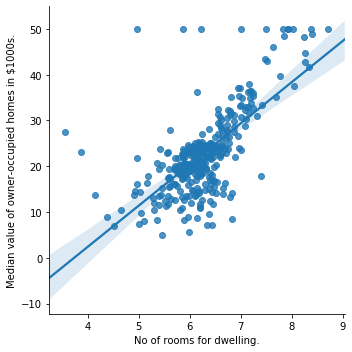

In [5]:
sns.lmplot('rm', 'medv', data)

plt.xlabel('No of rooms for dwelling.')
plt.ylabel('Median value of owner-occupied homes in $1000s.')

Text(10.049999999999997, 0.5, 'Median value of owner-occupied homes in $1000s.')

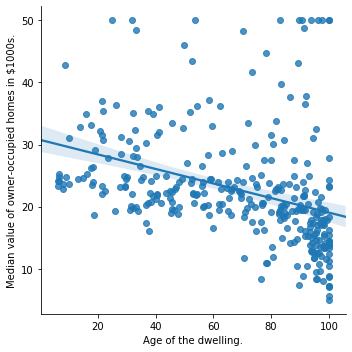

In [6]:
sns.lmplot('age', 'medv', data)

plt.xlabel('Age of the dwelling.')
plt.ylabel('Median value of owner-occupied homes in $1000s.')

Text(10.049999999999997, 0.5, 'Median value of owner-occupied homes in $1000s.')

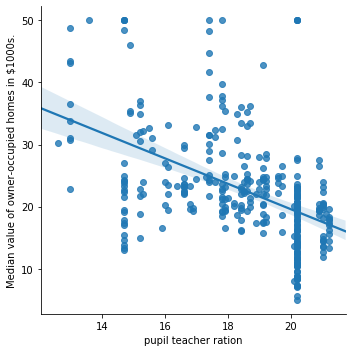

In [7]:
sns.lmplot('ptratio', 'medv', data)

plt.xlabel('pupil teacher ration')
plt.ylabel('Median value of owner-occupied homes in $1000s.')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
x = data.drop('medv', axis=1)
y = data['medv']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape

((266, 10), (67, 10))

In [10]:
data.columns

Index(['indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio',
       'lstat', 'medv'],
      dtype='object')

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = model.predict(x_test)
df_y = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
df_y.head(5)

,y_test,y_pred
ID,,
84,22.9,25.286595
81,28.0,28.573038
429,11.0,15.802755
150,15.4,12.971168
87,22.5,22.446971


In [18]:
print('Traning Score: ', model.score(x_train, y_train))

Traning Score:  0.7165238743004549


In [19]:
from sklearn.metrics import r2_score

print('Testing Score: ', r2_score(y_test, y_pred))

Testing Score:  0.6940069129106285


In [23]:
import statsmodels.api as sm
import numpy as np

x = np.array(x)
x[:5]

array([[  2.31  ,   0.    ,   0.538 ,   6.575 ,  65.2   ,   4.09  ,
          1.    , 296.    ,  15.3   ,   4.98  ],
       [  7.07  ,   0.    ,   0.469 ,   6.421 ,  78.9   ,   4.9671,
          2.    , 242.    ,  17.8   ,   9.14  ],
       [  2.18  ,   0.    ,   0.458 ,   6.998 ,  45.8   ,   6.0622,
          3.    , 222.    ,  18.7   ,   2.94  ],
       [  2.18  ,   0.    ,   0.458 ,   7.147 ,  54.2   ,   6.0622,
          3.    , 222.    ,  18.7   ,   5.33  ],
       [  7.87  ,   0.    ,   0.524 ,   6.012 ,  66.6   ,   5.5605,
          5.    , 311.    ,  15.2   ,  12.43  ]])

In [24]:
x = sm.add_constant(x)
x[:5]

array([[  1.    ,   2.31  ,   0.    ,   0.538 ,   6.575 ,  65.2   ,
          4.09  ,   1.    , 296.    ,  15.3   ,   4.98  ],
       [  1.    ,   7.07  ,   0.    ,   0.469 ,   6.421 ,  78.9   ,
          4.9671,   2.    , 242.    ,  17.8   ,   9.14  ],
       [  1.    ,   2.18  ,   0.    ,   0.458 ,   6.998 ,  45.8   ,
          6.0622,   3.    , 222.    ,  18.7   ,   2.94  ],
       [  1.    ,   2.18  ,   0.    ,   0.458 ,   7.147 ,  54.2   ,
          6.0622,   3.    , 222.    ,  18.7   ,   5.33  ],
       [  1.    ,   7.87  ,   0.    ,   0.524 ,   6.012 ,  66.6   ,
          5.5605,   5.    , 311.    ,  15.2   ,  12.43  ]])

In [27]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     80.83
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           1.25e-81
Time:                        12:54:33   Log-Likelihood:                -1001.0
No. Observations:                 333   AIC:                             2024.
Df Residuals:                     322   BIC:                             2066.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.3742      6.156      6.558      0.000      28.262      52.486
x1             0.0311      0.076      0.411      0.682      -0.118       0.180
x2             4.1569      1.178      3.528      0.000       1.839       6.475
x3           -17.3926      4.961     -3.506      0.001     -27.153      -7.632
x4             3.8496      0.525      7.329      0.000       2.816       4.883
x5            -0.0061      0.017     -0.356      0.722      -0.040       0.028
x6            -1.2646      0.253     -4.989      0.000      -1.763      -0.766
x7             0.2584      0.079      3.257      0.001       0.102       0.415
x8            -0.0105      0.005     -2.318      0.021      -0.019      -0.002
x9            -0.9617      0.162     -5.935      0.000      -1.281      -0.643
x10           -0.6368      0.063    -10.156      0.000      -0.760      -0.513
==============================================================================
Omnibus:                      120.893   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.496
Skew:                           1.557   Prob(JB):                    1.67e-100
Kurtosis:                       7.840   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""